In [3]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# import pandas as pd

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# url='https://drive.google.com/file/d/18UEhflIsMMfmbifTUNgH86xbJ9zUI6BE/view?usp=share_link'
# fileDownloaded = drive.CreateFile({'id':'18UEhflIsMMfmbifTUNgH86xbJ9zUI6BE'})
# fileDownloaded.GetContentFile('cancer_gene_expression.csv')

In [5]:
import pandas as pd
df = pd.read_csv('cancer_gene_expression.csv', delimiter=',' )
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [6]:
# Get only the columns with expression data
data = df.iloc[:,2:]
data.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale

X = scale(data)
y= df.iloc[:,1]

# apply PCA
pca = decomposition.PCA(n_components=.8)
X = pca.fit_transform(X)

loadings = pd.DataFrame(pca.components_.T *  np.sqrt(pca.explained_variance_), index=df.columns[2:])
loadings = loadings.abs()
loadings.sort_values(by = [1],ascending=False).head(10)
loadings

(130,)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1007_s_at,0.258359,0.781186,0.191110,0.105292,0.020352,0.000432,0.056285,0.024429,0.147915,0.226082,...,0.027620,0.026878,0.082283,0.018037,0.008238,0.020507,0.053860,0.086628,0.067735,0.040872
1053_at,0.431819,0.113789,0.463920,0.048851,0.387893,0.185476,0.073525,0.030699,0.081408,0.282795,...,0.063521,0.100039,0.013827,0.120313,0.108173,0.069548,0.042123,0.011064,0.041220,0.022133
117_at,0.042541,0.433298,0.107040,0.030131,0.247344,0.074741,0.262305,0.189941,0.203803,0.141532,...,0.050111,0.039046,0.002020,0.030753,0.044889,0.003965,0.160939,0.158348,0.056151,0.049532
121_at,0.893608,0.077811,0.004212,0.131372,0.014979,0.085396,0.080042,0.038894,0.081031,0.083716,...,0.048562,0.034240,0.030625,0.038095,0.017075,0.034229,0.021019,0.016961,0.002107,0.009082
1255_g_at,0.105023,0.302486,0.264193,0.433497,0.073197,0.238351,0.056597,0.068146,0.029414,0.006205,...,0.081278,0.048061,0.053209,0.021124,0.093846,0.041999,0.031914,0.032196,0.053579,0.067974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,0.486595,0.001532,0.326640,0.012046,0.195005,0.317793,0.295725,0.201643,0.170085,0.032019,...,0.013951,0.010333,0.055896,0.017455,0.027138,0.015352,0.035622,0.026338,0.002696,0.017661
AFFX-ThrX-M_at,0.318844,0.331434,0.149880,0.104459,0.301354,0.040355,0.203357,0.092299,0.172439,0.022166,...,0.104686,0.087251,0.134971,0.025923,0.026638,0.067600,0.016628,0.078947,0.061157,0.148706
AFFX-TrpnX-3_at,0.349892,0.269936,0.414491,0.327731,0.287298,0.117254,0.091406,0.130115,0.283420,0.112729,...,0.075133,0.013559,0.081723,0.014410,0.014569,0.033846,0.080374,0.081983,0.021118,0.032899
AFFX-TrpnX-5_at,0.535157,0.167970,0.058581,0.366672,0.308215,0.156492,0.133988,0.054306,0.123913,0.087548,...,0.032888,0.071307,0.069759,0.010102,0.092838,0.034643,0.028555,0.029767,0.081693,0.006875


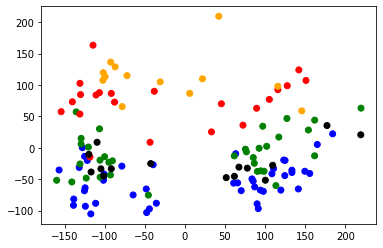

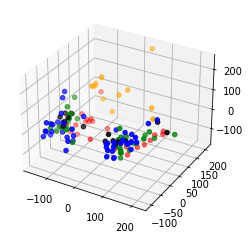

In [137]:
#generate + compare PCA plots

all_names = y.unique()
encoded_y = [list(all_names).index(yi) for yi in y]
rand_colors = [tuple(np.random.random(size=3)) for n in all_names]
rand_colors = ['blue', 'green', 'red', 'orange', 'black', 'yellow']
cmap = [rand_colors[yi] for yi in encoded_y]

#2d
plot = plt.scatter(X[:,0], X[:,1], c=cmap)
plt.show()

#3d plot
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=cmap)
plt.show()

In [150]:
from sklearn.decomposition import PCA
import plotly.express as px

X = scale(data)
y= df.iloc[:,1]
features = all_names

pca = PCA(n_components=2)
components = pca.fit_transform(X)


fig = px.scatter(components, x=0, y=1, color=y)
fig.show()

In [147]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [142]:
pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)